<h1><center>D212: Data Mining II</center></h1>
<br>
<center>Task 1: K-Means Clustering</center>
<br>
<center></center>
<br>
<center>Department of Information Technology, Western Governor's University</center>
<br>
<center>Dr. Kesselly Kamara</center>
<br>
<center>July 17, 2024</center>
<br>
<br>
<br>
<br>

## A1. Research Question and Technique

For this paper, I will attempt patient segmentation based on income, length of hospitalization, and total charge. The research question I am attempting to answer is as follows: Can income be used in combination with other continuous, numerical data to cluster patients into meaningful groups with which we as a hospital can be proactive? For example, if income creates a meaningful cluster with total charge and length of hospital stay where income is low and so are total charge and length of hospital stay, then that would mean patients who have a lower income seem to stay less time in the hospital and are charged less due to the shorter hospital stay. This situation would make intuitive sense--poorer patients may ask to be discharged earlier (even against doctor's recommendations) to avoid hospital bills. Thus, we might want to look into how we can better support low-income patients if such a cluster is identified, or at the very least run some more in-depth analysis on income's relationships with the variables in the dataset, especially length of hospital stay.

To identify patient clusters, I will be using the K-Means clustering algorithm on three continuous variables: Income, total charge, and length of hospital stay (otherwise known as initial_days.)

## A2. Analysis Goals
As aforementioned above, I intend to find meaningful clusters of patients based on income, total charge, and length of hospital stay. Identifying groups such as low-income low-length-of-stay patients may help WGU as a hospital to be proactive, as described above. Simply knowing such groups exist allow us to both study them in-depth using other algorithms (make sure the relationships found are concrete and not due to random chance) and also to create practices and programs that might benefit different identified groups. This would hopefully increase the hospital's revenue as well as improve patient outcomes. It is entirely possible, however, that while we may find clusters, we may find that the clusters do not provide us much information beyond what is already known about our patients-- and customers of any kind in general. Even that information is important to know, as it can inform future investigations and perhaps lead us to other clustering techniques.

## B1. Explanation of K-Means
The K-Means algorithm works by assigning each datapoint in the dataset to one of a certain number of clusters you specify. The number of clusters is called "k." Points are assigned by calculating their distance to k randomly selected centroids. For the initial iteration, the centroids are randomly selected. This is not so in subsequent iterations. Whichever of the k centroids any given point is closest to, it gets assigned to that cluster. By default, this distance is measured in euclidean distance.

Please note-- K can be any number you wish, and it is better to check several different k values before deciding on an "optimal" k-value to use. Often, this is done using an elbow plot, where we run K-Means multiple times, one for each number of clusters in a certain range you'd like to check. Then, we pick the optimal k by finding the place on the graph where the "elbow" is-- that is, where the graph stops sharply going down.

Once the algorithm assigns each datapoint to one of the k clusters, new centroids are calculated for each cluster. This "centroid" is basically the center of each cluster, and is composed of the mean of each of the cluster's variables. For example, if the dataset is composed of "Income" and "Total charge," the first coordinate of the centroid would be the mean of income for all the datapoints in the cluster currently. The second coordinate, similarly, is the mean of total charge for all the datapoints in the cluster currently. Note that the centroid is not usually a datapoint in the dataset itself.

Once the centroids are calculated, each datapoint is reassigned to the cluster whose centroid is nearest to it. The process is repeated iteratively until the cluster centers (centroids,) stop moving and datapoint assignments stop changing (Yıldırım, 2021).

I will use sklearn's K-Means algorithm to identify patient clusters out of the 10,000 patient dataset. Because K-Means can only be used on continuous variables, I will be using income, initial days, and total charge for this clustering exercise.

First, I will standardize the data, the reason for which I will discuss later. This will ensure each variable I will run K-Means on has mean = 0 and variance = 1. Then I will run K-Means several times in a for loop so I can understand the inertia of each number of clusters and pick an optimal k value. Intertia is retrieved on each iteration using .inertia_. I will plot inertia and number of clusters as a scatterplot so I can visualize the elbow plot and pick k. A good clustering has low inertia while also not having too many clusters.

Then, I will feed K-Means my selected k value in the final model. K-means will generate labels for each row in the dataframe based on the three variables I feed it. These labels are retrieved using .predict() on the model. I will add these labels to the dataframe, so that I can create a scatterplot of the datapoints and color them by label. Then, I can visualize whether or not the K-Means algorithm did a good job of clustering. I can also plot, if I wish, the final centroids the K-Means algorithm generated, which are retrieved using .cluster_centers_. Below you will see I picked k=2. Thus, I expect to see two well-defined clusters after running my final K-Means model.

## B2. K-Means Assumptions
While K-Means has two assumptions including that the clusters are spherical and isotropic and are similar in size, I will highlight only one, as requested.

K-Means is fundamentally unable to identify clusters that are not spherical in nature. Because it calculates distance to centroid, this naturally forms a spherical cluster shape. 

Let's say k is equal to 2. If the two clusters each have, for example, a horseshoe shape (see right image below, titled "irregular shaped data,") the points may be poorly split up (*Top Three Mistakes With K-Means Clustering During Data Analysis*, 2019). Half of each horseshoe may end up clustered together instead of clustering by each horseshoe shape, which is obvious to the human viewing the data, but not to the algorithm. This may be undesirable. In this scenario, the algorithm had poor accuracy in clustering the points because of the irregular shape.

![image info](https://zerowithdot.com/assets/mistakes-with-k-means-clustering/irregular.png)

## B3. Package Justification

For this project, I will be using Python and the following packages:

* Pandas
    * Pandas is useful because it allows us a framework for working with the data. Without it, using only numpy arrays would be rather clunky. Pandas allows the data to resemble a spreadsheet.
* NumPy
    * In this case, I will be using numpy for certain mathematical operations like summing, squaring, or square rooting.
* Matplotlib.pyplot
    * I will primarily be using this to create graphs such as the elbow plot and various scatterplots for data exploration.
* Sklearn
    * I will use several subpackages from sklearn. For scaling my data, I will use StandardScaler. Scaling is necessary for K-Means because it clusters based on distance. The larger a variance a column has, the more influence it has in K-Means. Thus, it is ideal if the columns used in K-Means are scaled.
    * I will, of course, use KMeans from sklearn.cluster. This provides me with the algorithm needed to actually perform KMeans on the dataset and identify clusters therein.
    * Finally, I will use silhouette_score from sklearn.metrics to try and evaluate my clustering model and understand how well-defined and usable the clusters generated are.
* Mpl_toolkits
    * mpl_toolkits allows me to create 3D scatterplots, since I am unable to do so with solely matplotlib.pyplot. These scatterplots are interactive and can be turned around their axes, which makes them especially useful for data exploration and the evaluation of clustering.
    

## C1. Data Preprocessing Goals
Because the amount of variance a particular feature or column has can make it have more or less influence on clustering results in K-Means, we must standardize the data before running K-Means on it. Standardization using StandardScaler will make each column's data have a mean of 0 and a variance of 1, meaning no feature should have more influence than another, since their variances will be equal after standardization. Thus, I will standardize the three columns of data I am using for K-Means-- income, intitial_days, and total charge-- before running K-Means on it.

## C2. Variable Selection & Categorization
Because K-Means can only be used on continuous variables, I will choose only continuous variables for my cluster analysis. Since I would also like to easily visualize the clusters, I am limiting myself to 3 continuous variables, but there are few continuous variables in this dataset anyway, so that is not much of a limit. The variables I have selected are as follows:

* Income (continuous): This column indicates the patient's annual income (or that of the primary insurance holder.)
* Initial_days (continuous): This is the length of a patient's hospital stay in days, though it is not rounded to the nearest day. Thus, partial days are possible and are written as decimals.
* TotalCharge (continuous): This column indicates the amount the patient was charged daily for their continued care.

## C3. Data Preparation Steps
Much of the cleaning code is exactly the same as what I used for my project in D206, as you will see below. Between code cells, I will explain what I am about to do-- the data preparation steps. The code directly underneath each explanation will perform the actions I mentioned.

First, I will perform some basic data cleaning, since being stored as a CSV caused the data to no longer be clean, despite the file name. I will import the packages I require, then I will load the data into a dataframe using read_csv. I will view it using df.head() and df.info() to simply get an idea of what I'm working with. In doing this, I can view the datatype for each column and check it against the actual data presented by df.head(). I will note anything I think needs to be fixed.

In [1]:
'''PLEASE NOTE! As you go through this code, please run each cell one by one! If you run all,
all of the graphs will close except for the last one. I added plt.close() calls throughout
this code so that I could make the 3D plots "stop" so that my future plots were not also on 3D axes when
they did not need to be. It is these very plt.close() calls that mean that if you run all cells,
you will close all plots but the last plot. Thus, as I said-- please run this cell by cell.'''
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#load csv into pandas dataframe. The CSV's first column is an index, so we let pandas know that too.
df=pd.read_csv('C:/Users/essay/Documents/D212 PA Dataset/medical_clean.csv', index_col = 0)

#visually inspect dataframe's datatypes and size to ensure it loaded properly.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Mari

In [2]:
# Visually inspect dataframe to ensure data loaded as expected and do initial visual exploration
pd.set_option("display.max_columns", None)
df.head(10)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3
6,S543885,e3b0a319-9e2e-4a23-8752-2fdc736c30f4,03e447146d4a32e1aaf75727c3d1230c,Braggs,OK,Muskogee,74423,35.67302,-95.19180,981,Urban,America/Chicago,Corporate treasurer,3,76,81999.88,Never Married,Male,No,19.612646,6,0,0,No,Observation Admission,No,No,Medium,Yes,Yes,Yes,No,Yes,No,Yes,No,No,Blood Work,5.957250,2636.691180,12742.589910,4,5,4,4,3,5,4,6
7,E543302,2fccb53e-bd9a-4eaa-a53c-9dfc0cb83f94,e4884a42ba809df6a89ded6c97f460d4,Thompson,OH,Geauga,44086,41.67511,-81.05788,2558,Rural,America/New_York,Hydrologist,0,50,10456.05,Never Married,Male,No,14.751687,6,0,0,No,Emergency Admission,Yes,No,Low,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Intravenous,9.058210,3694.627161,16815.513600,4,3,3,2,3,4,5,5
8,K477307,ab634508-dd8c-42e5-a4e4-d101a46f2431,5f78b8699d1aa9b950b562073f629ca2,Strasburg,VA,Shenandoah,22641,39.08062,-78.39150,479,Urban,America/New_York,Psychiatric nurse,7,40,38319.29,Divorced,Female,No,19.688673,7,2,0,No,Observation Admission,No,No,Medium,Yes,No,No,No,No,No,No,No,No,Intravenous,14.228019,3021.499039,6930.572138,1,2,2,5,4,2,4,2
9,Q870521,67b386eb-1d04-4020-9474-542a09d304e3,e8e016144bfbe14974752d834f530e26,Panama City,FL,Bay,32404,30.20097,-85.50610,40029,Urban,America/Chicago,Computer games developer,0,48,55586.48,Widowed,Male,No,19.653320,6,3,0,No,Emergency Admission,No,No,Low,Yes,No,No,Yes,No,No,No,No,No,Intravenous,6.180339,2968.402860,8363.187290,3,3,2,3,3,3,4,2


Zip codes, due to being stored as a CSV, have both been stored as a numerical datatype and lost their leading zeros because of it. Both of these things need to be fixed. I will convert the zip code column to the string datatype and pad the front of the zip code strings with zeroes up to the appropriate length, which is 5 digits. This is how they should be written.

Next, I will identify all the columns that should be the category datatype but are not (usually stored as strings instead.) These columns are: Area, marital, initial_admin, complication_risk, Services, readmis, soft_drink, highBlood, stroke, arthritis, diabetes, hyperlipidemia, backPain, allergic_rhinitis, reflux_esophagitis, and asthma. I will use a for loop to cycle through this list of columns and convert each to "category."

Gender, Overweight, Anxiety, and Job will also be converted to the datatype "category," and were separated out in D206 because they needed extra work that no longer needs to be done (in the D206 dataset, they were re-expressed as numbers.) Even though they are not in the for loop, the same conversion will be done to them as to those that are converted in the for loop.

Lastly, the Item# columns will be converted to an ordered categorical datatype using a for loop. I will identify the columns and store them in a variable which the for loop will cycle over, converting each Item# column first to "string," and then to "ordered categorical." Survey scores should be in an ordered categorical datatype because order does matter for them-- they are scored, and each score is higher or lower than the last.

In [3]:
#Clean datatypes up using code from D206 PA. 
#[In-Text Citation: (Nelson, 2023).]

# Convert Zip to string from integer.
df['Zip'] = df['Zip'].astype('str')
# Add leading zeros using zfill()
df['Zip'] = df['Zip'].str.zfill(5)
# Identify columns that can be converted all at once to category datatype using for loop.
category_cols = df[['Area', 'Marital', 'Initial_admin', 'Complication_risk', 'Services', 'ReAdmis',
                         'Soft_drink', 'HighBlood', 'Stroke', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
                         'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma']]
# Will do Item# columns later since they require an order. Timezone needs a dict written, will do that later too.
for col in category_cols:
    df[col] = df[col].astype('category')
# Convert gender to category datatype.
df['Gender'] = df['Gender'].astype('category')
# Convert Overweight to category datatype.
df['Overweight'] = df['Overweight'].astype('category')
# Convert Anxiety to category datatype.
df['Anxiety'] = df['Anxiety'].astype('category')
# Convert Job to category datatype.
df['Job'] = df['Job'].astype('category')

# Create ordered categories for Item# variables. 8 is "least important" and 1 is "most important"
survey_scores = CategoricalDtype(categories=['8', '7', '6', '5', '4', '3', '2', '1'], ordered=True)
# Identify columns that need to become ordered categorical
ord_cat_cols = df[['Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8']]
# Create for loop to convert columns above to string (issues if not string first,) then ordered categorical datatype.
for col in ord_cat_cols:
    df[col] = df[col].astype('str')
    df[col] = df[col].astype(survey_scores)

In the next code block, I will simplify the timezone column. It has many superfluous categories that only serve to confuse rather than be helpful. For example, I have no idea, off the top of my head, where "Menominee" is. Because of that fact, I don't know what timezone this refers to. A Google search tells me Menominee is in central time. To eliminate this problem, I will simply replace the city specific timezones with the 7 widely-known ones. I will also fix the datatype, which should be "category."

Because dollars are commonly rounded to two decimal places, I will round TotalCharge and Additional_charges to two decimal places. There is no reason for excess precision.

In [4]:
# Write dictionary for option reduction for Timezone column
mapping_timezone = {'America/Puerto_Rico' : 'Atlantic',
          'America/New_York' : 'Eastern',
          'America/Detroit' : 'Eastern',
          'America/Indiana/Indianapolis' : 'Eastern',
          'America/Indiana/Vevay' : 'Eastern',
          'America/Indiana/Vincennes' : 'Eastern',
          'America/Kentucky/Louisville' : 'Eastern',
          'America/Toronto' : 'Eastern',
          'America/Indiana/Marengo' : 'Eastern',
          'America/Indiana/Winamac' : 'Eastern',
          'America/Chicago' : 'Central',
          'America/Menominee' : 'Central',
          'America/Indiana/Knox' : 'Central',
          'America/Indiana/Tell_City' : 'Central',
          'America/North_Dakota/Beulah' : 'Central',
          'America/North_Dakota/New_Salem' : 'Central',
          'America/Denver' : 'Mountain',
          'America/Boise' : 'Mountain',
          'America/Phoenix' : 'Mountain',
          'America/Los_Angeles' : 'Pacific',
          'America/Nome' : 'Alaskan',
          'America/Anchorage' : 'Alaskan',
          'America/Sitka' : 'Alaskan',
          'America/Yakutat' : 'Alaskan',
          'America/Adak' : 'Hawaiian',
          'Pacific/Honolulu' : 'Hawaiian'
          }
# Use dictionary to convert timezone options.
df.TimeZone.replace(mapping_timezone, inplace=True)
# Convert timezone to category datatype.
df['TimeZone'] = df['TimeZone'].astype('category')

In [5]:
# Round TotalCharge to 2 decimal places
df['TotalCharge'] = df.TotalCharge.round(2)
# Round Additional_charges to 2 decimal places
df['Additional_charges'] = df.Additional_charges.round(2)

In [6]:
#Re-inspect dataframe to see if changes took.
df.info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Customer_id         10000 non-null  object  
 1   Interaction         10000 non-null  object  
 2   UID                 10000 non-null  object  
 3   City                10000 non-null  object  
 4   State               10000 non-null  object  
 5   County              10000 non-null  object  
 6   Zip                 10000 non-null  object  
 7   Lat                 10000 non-null  float64 
 8   Lng                 10000 non-null  float64 
 9   Population          10000 non-null  int64   
 10  Area                10000 non-null  category
 11  TimeZone            10000 non-null  category
 12  Job                 10000 non-null  category
 13  Children            10000 non-null  int64   
 14  Age                 10000 non-null  int64   
 15  Income              10000 non-null  

In [7]:
df.head(10)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,Central,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.70,17939.40,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,Central,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.19,17613.00,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,Central,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.23,17505.19,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,Central,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.83,12993.44,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,Eastern,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.07,3716.53,2,1,3,3,5,3,4,3
6,S543885,e3b0a319-9e2e-4a23-8752-2fdc736c30f4,03e447146d4a32e1aaf75727c3d1230c,Braggs,OK,Muskogee,74423,35.67302,-95.19180,981,Urban,Central,Corporate treasurer,3,76,81999.88,Never Married,Male,No,19.612646,6,0,0,No,Observation Admission,No,No,Medium,Yes,Yes,Yes,No,Yes,No,Yes,No,No,Blood Work,5.957250,2636.69,12742.59,4,5,4,4,3,5,4,6
7,E543302,2fccb53e-bd9a-4eaa-a53c-9dfc0cb83f94,e4884a42ba809df6a89ded6c97f460d4,Thompson,OH,Geauga,44086,41.67511,-81.05788,2558,Rural,Eastern,Hydrologist,0,50,10456.05,Never Married,Male,No,14.751687,6,0,0,No,Emergency Admission,Yes,No,Low,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Intravenous,9.058210,3694.63,16815.51,4,3,3,2,3,4,5,5
8,K477307,ab634508-dd8c-42e5-a4e4-d101a46f2431,5f78b8699d1aa9b950b562073f629ca2,Strasburg,VA,Shenandoah,22641,39.08062,-78.39150,479,Urban,Eastern,Psychiatric nurse,7,40,38319.29,Divorced,Female,No,19.688673,7,2,0,No,Observation Admission,No,No,Medium,Yes,No,No,No,No,No,No,No,No,Intravenous,14.228019,3021.50,6930.57,1,2,2,5,4,2,4,2
9,Q870521,67b386eb-1d04-4020-9474-542a09d304e3,e8e016144bfbe14974752d834f530e26,Panama City,FL,Bay,32404,30.20097,-85.50610,40029,Urban,Central,Computer games developer,0,48,55586.48,Widowed,Male,No,19.653320,6,3,0,No,Emergency Admission,No,No,Low,Yes,No,No,Yes,No,No,No,No,No,Intravenous,6.180339,2968.40,8363.19,3,3,2,3,3,3,4,2


In the code below, I will create a 3D scatterplot to visualize the viability of clustering the data based on the three continuous variables I have chosen. This scatterplot is interactive (provided you are running this code cell by cell and not all at once.) If this scatterplot reveals rather uniform data, I would need to pick new variables to run clustering on. Fortunately, that is not the case below. This is more of a data exploration step, but it is worth noting. Because the next step after this is standardization, it will be helpful to know what the data looked like before the transformation. After standardization, its representation on the scatterplot should not change, aside from the scale of the axes.

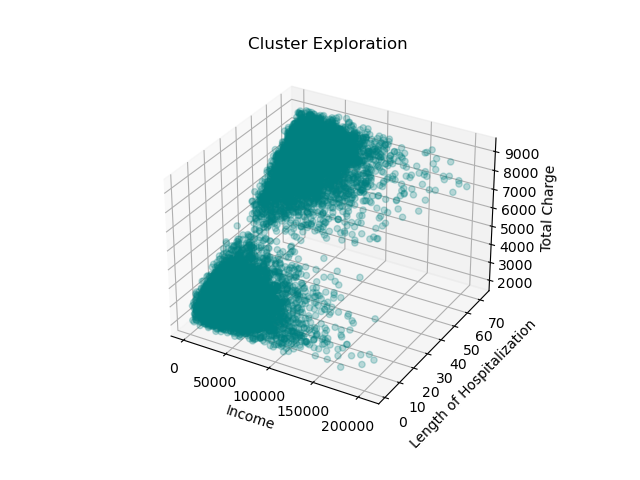

In [9]:
# Check out possible clusters visually using a 3D scatterplot we can rotate
# [In-text Citation: (GeeksforGeeks, 2024).]
%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')

plot = ax.scatter3D(df['Income'], df['Initial_days'], df['TotalCharge'], color = 'teal', alpha = 0.25)
ax.set_title('Cluster Exploration')
ax.set_xlabel('Income')
ax.set_ylabel('Length of Hospitalization')
ax.set_zlabel('Total Charge')
plt.show()

Below, I will finally standardize the three columns of my data that I will be using for K-Means. I will use StandardScaler to accomplish this, which transforms each column fed to it so that each column's mean is 0 and variance is 1. This ensures no one column has a heavier influence on the clustering algorithm than another.

After scaling, I will make another interactive 3D scatterplot so I can visualize the data again, which should look no different on the scatterplot aside from the axes having shifted to much smaller numbers.

In [10]:
plt.close()
# Standardize data prior to K-Means clustering, since feature variance = feature influence for this technique
cols_to_scale = ['Income', 'Initial_days', 'TotalCharge']
scaler = StandardScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Check data to make sure scaling took.
df.head(5)

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
CaseOrder,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,Central,"Psychologist, sport and exercise",1,53,1.615914,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,-0.907310,-0.727186,17939.40,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,Central,Community development worker,3,51,0.221443,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,-0.734595,-0.513228,17613.00,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,Central,Chief Executive Officer,3,53,-0.915870,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,-1.128292,-1.319985,17505.19,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,Central,Early years teacher,0,78,-0.026263,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,-1.244503,-1.460517,12993.44,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,Eastern,Health promotion specialist,1,22,-1.377325,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,-1.261991,-1.467287,3716.53,2,1,3,3,5,3,4,3


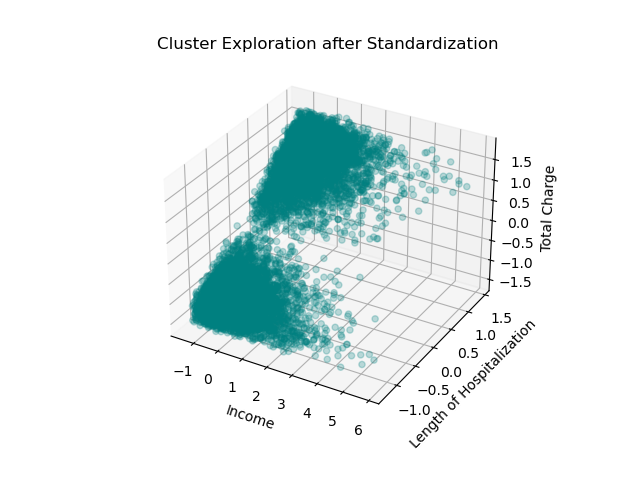

In [11]:
# Let's visually check that 3D scatterplot again-- it should look the same, except the axes will be smaller.
fig2 = plt.figure()
ax2 = plt.axes(projection='3d')

plot2 = ax2.scatter3D(df['Income'], df['Initial_days'], df['TotalCharge'], color = 'teal', alpha = 0.25)
ax2.set_title('Cluster Exploration after Standardization')
ax2.set_xlabel('Income')
ax2.set_ylabel('Length of Hospitalization')
ax2.set_zlabel('Total Charge')
plt.show()

## C4. Cleaned Dataset
Below you will find the code used for exporting the cleaned and prepared dataset. It will be submitted alongside this paper as a CSV.

In [12]:
df.to_csv('KMeans_Clean_Task1.csv', index=False)

## D1. Number of Clusters Optimization
In order to determine the optimal number of clusters, I will use an elbow plot. An elbow plot, also known as the elbow method, works by running K-Means multiple times, once for each number of clusters in a certain range you'd like to check. Then, an optimal k is picked by finding the place on the graph where the "elbow" is-- that is, where the graph stops sharply going down.

An elbow plot has inertia on the y-axis and number of clusters on the x-axis. A good clustering has low inertia while also not having too many clusters. It is a tradeoff between the two. The plot below shows a change at k (clusters) = 2 from a very sharp drop in inertia to a much less steep one. Thus, I will pick k = 2. However, one could argue that a k equal to three or even four might also be ideal, but since my 3D scatterplots above give me visual evidence to the contrary, I will pick k = 2.

Below, you will find the code for clustering analysis/k-optimization.

## D2. Cluster Analysis and Optimization Code

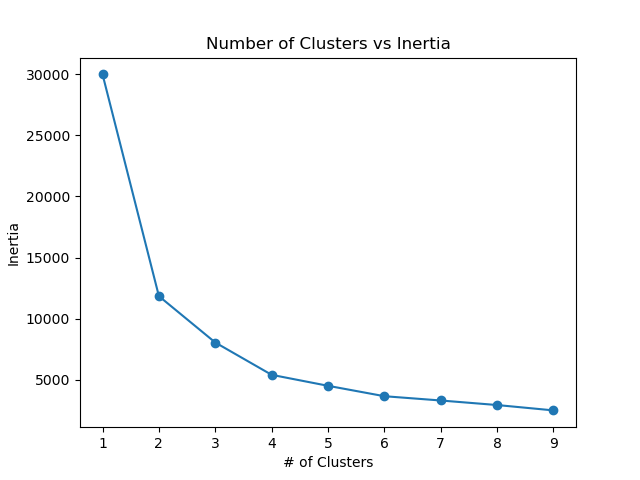

In [13]:
plt.close()
# The scatterplots above indicate 2 clusters, at least visually. Let's do an elbow plot though.
# Fitting on just 3 columns of the dataframe
np.random.seed(7)
num_clusters = range(1,10)
inertias = []
for k in num_clusters:
    model = KMeans(n_clusters=k, n_init='auto')
    model.fit(df[cols_to_scale])
    inertias.append(model.inertia_)
fig3 = plt.figure()
ax3 = fig3.add_subplot(111)
plt.plot(num_clusters, inertias, '-o')
ax3.set_xlabel('# of Clusters')
ax3.set_ylabel('Inertia')
ax3.set_xticks(num_clusters)
ax3.set_title('Number of Clusters vs Inertia')
plt.show()

## E1. Cluster Quality & Accuracy
Below, you will find the code used to create my final K-Means model that clusters the data into two clusters, based on the above analysis. Following that code are a number of graphs I will reference here to try and analyze how accurate the K-Means clustering was.

First, let's observe the clusters visually, starting with their centroids. Each centroid is the mean of the datapoints that make up the cluster, and each coordinate of the centroid is the mean value of each column used in the clustering analysis for that cluster's datapoints. Thus, in our case, each centroid is composed of the means of income, initial days, and total charge for all the datapoints within a cluster. When looking at the centroids, we can tell that they are sufficiently distinct if the means of these columns appear to be distant numerically. For simplicity's sake, I will round when I discuss the centroids below.

Below, we can see that Cluster 0 has a mean income of -0.009, while Cluster 1's mean income is 0.009. These are symmetrical, but not sufficiently distant. They differ by only 0.018, which is very little. Thus, income may not have meant much in our K-Means clustering.

Cluster 0 also has a mean initial days of 0.96 while Cluster 1 has a mean initial days of -0.96, which are quite far apart on our standardized scale-- sufficiently so. The means of total charge between the two clusters are very similar to those of initial days, with Cluster 0's being 0.95 and Cluster 1's being -0.95. As it was with initial days, these are also sufficiently different from each other.

While analyzing numbers in a table is great, let's also look at this using graphs, specifically histograms. A histogram will show us the distribution of each cluster according to each column-- income, initial days, or total charge-- and allow us to confirm or deny our suspicions after looking at the centroid table.

First, let's look at an overall view. The first, purple and yellow graph shows the dataset plotted on 3D axes where each datapoint is colored by what cluster it is in. There appears to be little overlap in the clusters, and the clusters appear to be well defined. This is good.

Next, let's look at how the cluster's differ based on each variable used to create them using histograms. This will show us how the distribution of datapoints differs between each cluster. Income, as expected, has almost exactly the same distribution in each cluster. Thus, we can assume income did not mean much to our clustering algorithm. Even without it, we would have still been able to find two clusters, which is illustrated using a traditional, 2D scatterplot below the histograms.

The histograms for both initial days and total charge both reflect the same thing: There is very little overlap between the two cluster distributions for these variables, which is what we want to see when trying to make a good clustering. Overlap should be minimized.

Finally, in an attempt to put a single number to the "accuracy" of this K-Means clustering, let's use a silhouette score. Since we have no labels for our clusters that we can calculate an accuracy against, this is the metric we will use to make a concrete decision on if this K-Means clustering did a good job of creating clusters.

A silhouette score ranges from -1 to 1. A score of 1 indicates that the clusters are sufficiently distant from each other and are clearly distinguished, while a score of -1 indicates the clusters are assigned poorly. A score of 0 means the clusters are "indifferent," or that the distance between the clusters isn't significant enough (Bhardwaj, 2021). These clusters achieved a score of 0.58, which is decent. It is possible my inclusion of income as a variable may have lowered this score, since income did not differ significantly between the clusters.

In [14]:
plt.close()
# Final Clustering model, with number of clusters chosen definitively based on above analysis
final_model = KMeans(n_clusters=2, n_init='auto')
final_model.fit(df[cols_to_scale])
df['labels'] = final_model.predict(df[cols_to_scale])
centroids = pd.DataFrame(final_model.cluster_centers_)
centroids.rename({0:'Income',1:'Initial Days', 2:'Total Charge'}, inplace=True, axis=1)
centroids

,Income,Initial Days,Total Charge
0,-0.008646,0.959217,0.947462
1,0.008639,-0.958450,-0.946704


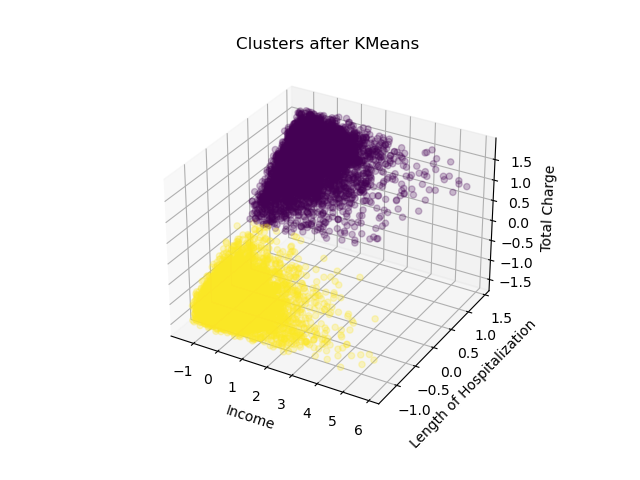

In [15]:
# Let's check out the 3D graph again but this time with clusters defined by color.
fig4 = plt.figure()
ax4 = plt.axes(projection='3d')

plot4 = ax4.scatter3D(df['Income'], df['Initial_days'], df['TotalCharge'], c = df['labels'], alpha = 0.25)
ax4.set_title('Clusters after KMeans')
ax4.set_xlabel('Income')
ax4.set_ylabel('Length of Hospitalization')
ax4.set_zlabel('Total Charge')

plt.show()

In [16]:
plt.close()
evaluation_table = pd.Series(final_model.labels_).value_counts()
print(evaluation_table)

1    5002
0    4998
dtype: int64


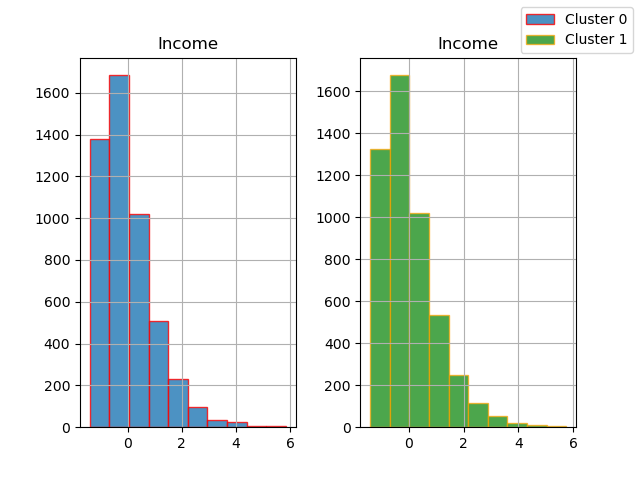

In [17]:
# [In-Text Citation: (How to Plot Two Histograms Side by Side Using Matplotlib?, n.d.).]
cluster_0_filtered = df[df['labels'] == 0]
cluster_1_filtered = df[df['labels'] == 1]
fig, axes = plt.subplots(1,2)
cluster_0_filtered.hist('Income', label = 'Cluster 0', alpha = 0.8, edgecolor='red', ax=axes[0])
cluster_1_filtered.hist('Income', label = 'Cluster 1', alpha = 0.7, color = 'green', edgecolor='orange', ax=axes[1])
fig.legend()
plt.show()

In [18]:
cluster_0_filtered['Income'].describe()

count    4998.000000
mean       -0.008646
std         0.994933
min        -1.409190
25%        -0.734013
50%        -0.240628
75%         0.470837
max         5.847132
Name: Income, dtype: float64

In [19]:
cluster_1_filtered['Income'].describe()

count    5002.000000
mean        0.008639
std         1.005162
min        -1.414334
25%        -0.730298
50%        -0.228132
75%         0.498760
max         5.752226
Name: Income, dtype: float64

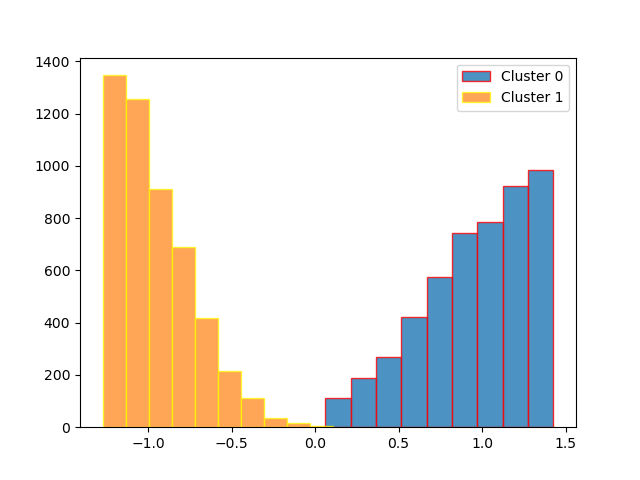

In [20]:
plt.close()
cluster_0_filtered = df[df['labels'] == 0]
cluster_1_filtered = df[df['labels'] == 1]
plt.hist(cluster_0_filtered['Initial_days'], label = 'Cluster 0', alpha = 0.8, edgecolor='red')
plt.hist(cluster_1_filtered['Initial_days'], label = 'Cluster 1', alpha = 0.7, edgecolor='yellow')
plt.legend()
plt.show()

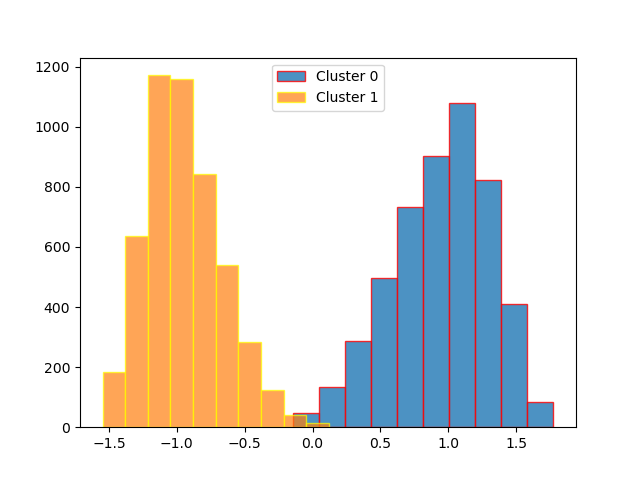

In [21]:
plt.close()
cluster_0_filtered = df[df['labels'] == 0]
cluster_1_filtered = df[df['labels'] == 1]
plt.hist(cluster_0_filtered['TotalCharge'], label = 'Cluster 0', alpha = 0.8, edgecolor='red')
plt.hist(cluster_1_filtered['TotalCharge'], label = 'Cluster 1', alpha = 0.7, edgecolor='yellow')
plt.legend()
plt.show()

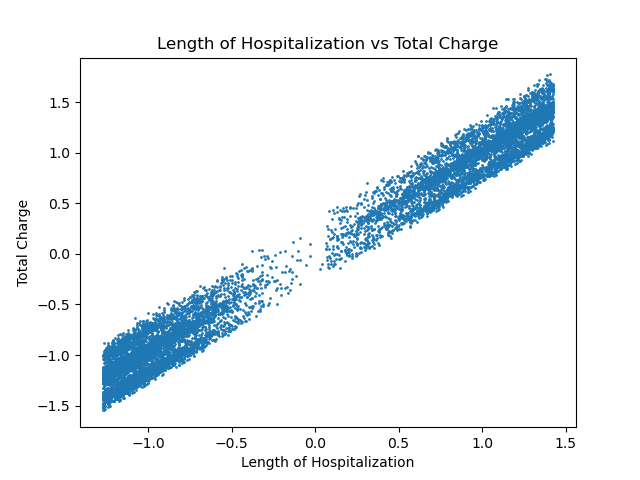

In [22]:
# Income doesn't really tell us anything in our clusters. The two clusters exist even without income information.
# Scatterplot shows this nicely.
plt.close()
plt.scatter(x=df['Initial_days'], y=df['TotalCharge'], s=1)
plt.title('Length of Hospitalization vs Total Charge')
plt.xlabel('Length of Hospitalization')
plt.ylabel('Total Charge')
plt.show()

In [23]:
# Final model silhouette score.
plt.close()
sil_score = silhouette_score(df[cols_to_scale],df['labels'])
print(f'Silhouette score: {sil_score}')

Silhouette score: 0.5781046662396735


## E2. Analysis Results & Implications
In analyzing cluster quality above, we also uncovered some of the analysis results. Cluster 0 and Cluster 1 differ significantly in both initial days (length of hospital stay) and total charge, but do not differ significantly in income. Both clusters have very similar annual incomes, both situated very near the mean of all patients. Cluster 0 has a high length of hospital stay and a high total charge while Cluster 1 has a low length of hospital stay and a low total charge. This makes intuitive sense, which is unfortunate. This is something we could have come with without using a clustering technique at all. If you stay longer at the hospital, you will owe more money. Simple. Thus, we did not identify any clusters that affected only low income or only high income patients, as we had hoped. In fact, the inclusion of income as a variable mattered little to the clusters formed.

Because we failed to find clusters that differed based on income, there is no new information learned-- aside from the fact that what we assumed in the beginning was not true. Income does not affect people the way we thought it might, and what is left over in our clusters is simple common sense.

## E3. Analysis Limitations
One limitation of this analysis is that when I first inspected the clusters of data using the initial 3D scatterplot, the clusters were fairly spherical in nature, though *how* "spherical" is good enough is fairly subjective. Because the data was gathered around two "corners" of the 3D plot, it is actually rather square in these areas before spreading out and becoming more sparse. Most of the data is also flattened on the 45-degree plane perpendicular to the income axis. This actually makes the clusters somewhat oblong and flat, which could have negatively impacted the results of the K-Means algorithm.

## E4. Recommendations
Because we learned nothing from this analysis beyond what was already obvious from common sense, I would perhaps try another clustering algorithm, one that allows for the analysis of categorical variables. This dataset is heavy on categorical variables, which may yield more interesting clusters than the ones we found here.

The insights gleaned from this particular cluster analysis are not actionable. Income did not matter in our clustering, as both clusters had the same income distribution. Unlike our initial assumption, clusters of low income, low length of stay people do not exist in our data, and nothing else about the clusters was remarkable.

## F. Panopto

Here is the link to my Panopto video: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=6cf9d3d7-ddfa-4cb8-be25-b1b4014fca4e

## G. Code Sources

GeeksforGeeks. (2024, March 15). *Make 3D interactive Matplotlib plot in Jupyter Notebook.* GeeksforGeeks. https://www.geeksforgeeks.org/make-3d-interactive-matplotlib-plot-in-jupyter-notebook/

Nelson, M. (2023, August 8). *D206: Data Cleaning Performance Assessment.* Unpublished manuscript, Western Governors University.

## H. Content Sources

Bhardwaj, A. (2021, December 14). Silhouette Coefficient - towards data science. *Medium.* https://towardsdatascience.com/silhouette-coefficient-validating-clustering-techniques-e976bb81d10c

*How to plot two histograms side by side using Matplotlib?* (n.d.). https://www.tutorialspoint.com/how-to-plot-two-histograms-side-by-side-using-matplotlib

*Top three mistakes with K-Means Clustering during data analysis.* (2019, October 14). https://zerowithdot.com/mistakes-with-k-means-clustering/

Yıldırım, S. (2021, December 13). K-Means clustering — explained - towards data science. *Medium.* https://towardsdatascience.com/k-means-clustering-explained-4528df86a120